In [4]:
library(data.table) 
library(repr)
library(pheatmap)
library(reshape2)
library(ComplexUpset)
library(ggplot2)
library(ComplexHeatmap)

## Visualization of donor matching
### between Vireo and Multiseq

In [5]:
# Load correlation matrix
correlation_gx12 <- fread("../data/pipeline_output/gx12/donor_match/vireo_1_vs_multiseq_1/correlation_res.csv")
correlation_gx12 <- as.data.frame(correlation_gx12)
rownames(correlation_gx12) <- correlation_gx12$V1
correlation_gx12 <- correlation_gx12[,-1]
colnames(correlation_gx12) <- gsub("donor", "Donor-", colnames(correlation_gx12))
rownames(correlation_gx12) <- gsub("-TotalSeqA", "", rownames(correlation_gx12))

correlation_gx12

,Donor-0,Donor-1,Donor-2,Donor-3,Donor-4,Donor-5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Hash451,-0.2275197,0.74937992,-0.18132714,-0.18549398,-0.09556602,-0.19805405
Hash452,-0.2014033,-0.18286343,-0.11152722,-0.16170086,-0.09407122,0.75006417
Hash453,-0.1924779,-0.06637141,0.55651595,-0.09256307,-0.04810021,-0.14982165
Hash454,0.8930860,-0.25194820,-0.19171140,-0.18771778,-0.12500167,-0.19582197
Hash455,-0.1037505,-0.08837050,-0.01772064,-0.06368348,0.52835531,-0.06691017
Hash456,-0.1832036,-0.19431709,-0.13199943,0.78693512,-0.09013880,-0.14997682


In [6]:
# Scale the matrix between -1 and 1

correlation_gx12 <- as.matrix(correlation_gx12)

min_value <- min(correlation_gx12)
max_value <- max(correlation_gx12)

scaled_matrix <- ((correlation_gx12 - min_value) / (max_value - min_value)) * 2 - 1
scaled_matrix 

,Donor-0,Donor-1,Donor-2,Donor-3,Donor-4,Donor-5
Hash451,-0.9573314,0.7489925,-0.8766481,-0.8839262,-0.7268515,-0.9058646
Hash452,-0.9117145,-0.8793315,-0.7547305,-0.8423674,-0.7242406,0.7501877
Hash453,-0.8961249,-0.6758581,0.4121223,-0.7216063,-0.6439443,-0.8216183
Hash454,1.0000000,-1.0000000,-0.8947860,-0.8878105,-0.7782659,-0.9019658
Hash455,-0.7411471,-0.7142833,-0.5908811,-0.6711631,0.3629349,-0.6767991
Hash456,-0.8799256,-0.8993373,-0.7904887,0.8145892,-0.7173719,-0.8218894


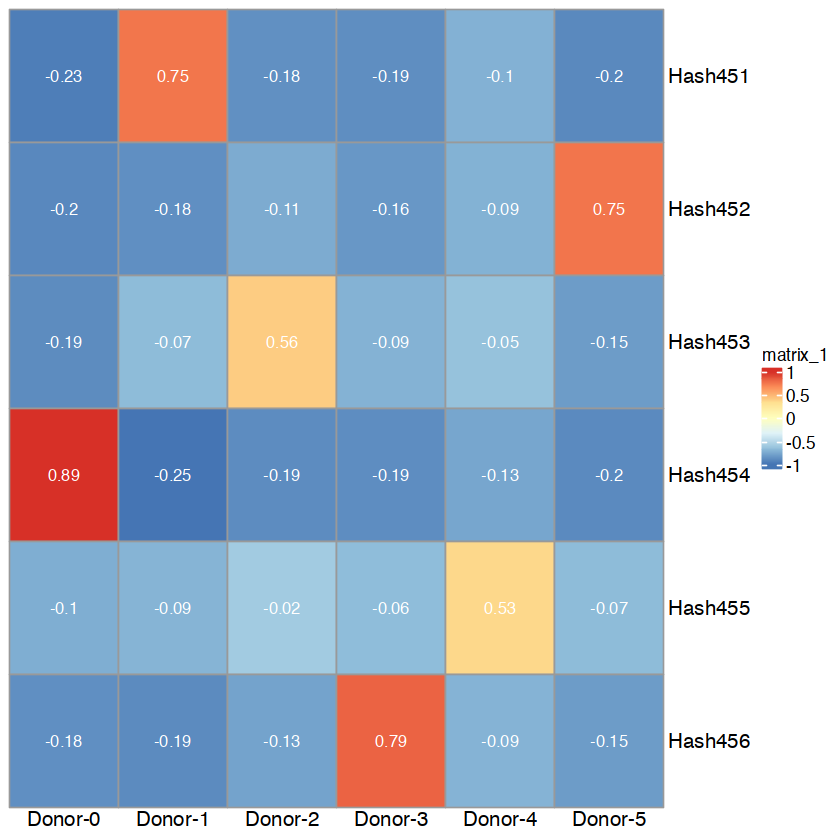

In [7]:
# Define the color palette and the annotation
newCols <- colorRampPalette(grDevices::rainbow(6))
annoCol <- newCols(6)
names(annoCol) <- colnames(correlation_gx12)
annoCol <- list(category = annoCol)

# Sort the axis
scaled_matrix <- scaled_matrix[order(row.names(scaled_matrix)), ]

# Heatamp
pheatmap(scaled_matrix, treeheight_row=F, treeheight_col=F, display_numbers=round(correlation_gx12,2), angle_col="0",
         number_color = "white", fontsize = 12, cluster_rows = F, cluster_cols = F) #, filename="concordance_heatmap_gx12.png", width = 7, height = 5

### Summarize all donor matching result

In [8]:
### Matching scores Among all genotype- and hashing-based methods
all_score <- fread("../data/pipeline_output/gx12/donor_match/score_record.csv")
all_score 

best_method1,best_method2,score,matched_donor,remain_na
<chr>,<chr>,<dbl>,<int>,<lgl>
freemuxlet_1,demuxem_1,0.730876057,6,FALSE
scsplit_1,demuxem_1,0.591616257,6,FALSE
souporcell_1,demuxem_1,0.741823027,6,FALSE
vireo_1,demuxem_1,0.745926893,6,FALSE
freemuxlet_1,hashsolo_1,0.005432033,2,TRUE
scsplit_1,hashsolo_1,0.005965695,2,TRUE
souporcell_1,hashsolo_1,0.005517447,2,TRUE
vireo_1,hashsolo_1,0.005585453,2,TRUE
freemuxlet_1,htodemux_1,0.174024589,4,TRUE


In [9]:
score_matrix <- reshape(all_score[,1:3], idvar = "best_method1", timevar ="best_method2", direction = "wide")
score_matrix <- score_matrix[, -1]
score_matrix <- as.matrix(score_matrix)

colnames(score_matrix) <- c("DemuxEM", "HashSolo", "HTODemux", "Multiseq", "hashedDrops")
rownames(score_matrix) <- c("Freemuxlet", "scSplit", "Souporcell", "Vireo")
score_matrix  <- score_matrix[, c("DemuxEM", "Multiseq", "HashSolo", "HTODemux", "hashedDrops")]
score_matrix 

,DemuxEM,Multiseq,HashSolo,HTODemux,hashedDrops
Freemuxlet,0.7308761,0.6944519,0.005432033,0.1740246,0.7471688
scSplit,0.5916163,0.5790836,0.005965695,0.1592075,0.7368967
Souporcell,0.7418230,0.7055291,0.005517447,0.1790759,0.7471688
Vireo,0.7459269,0.7107227,0.005585453,0.1818275,0.7471688


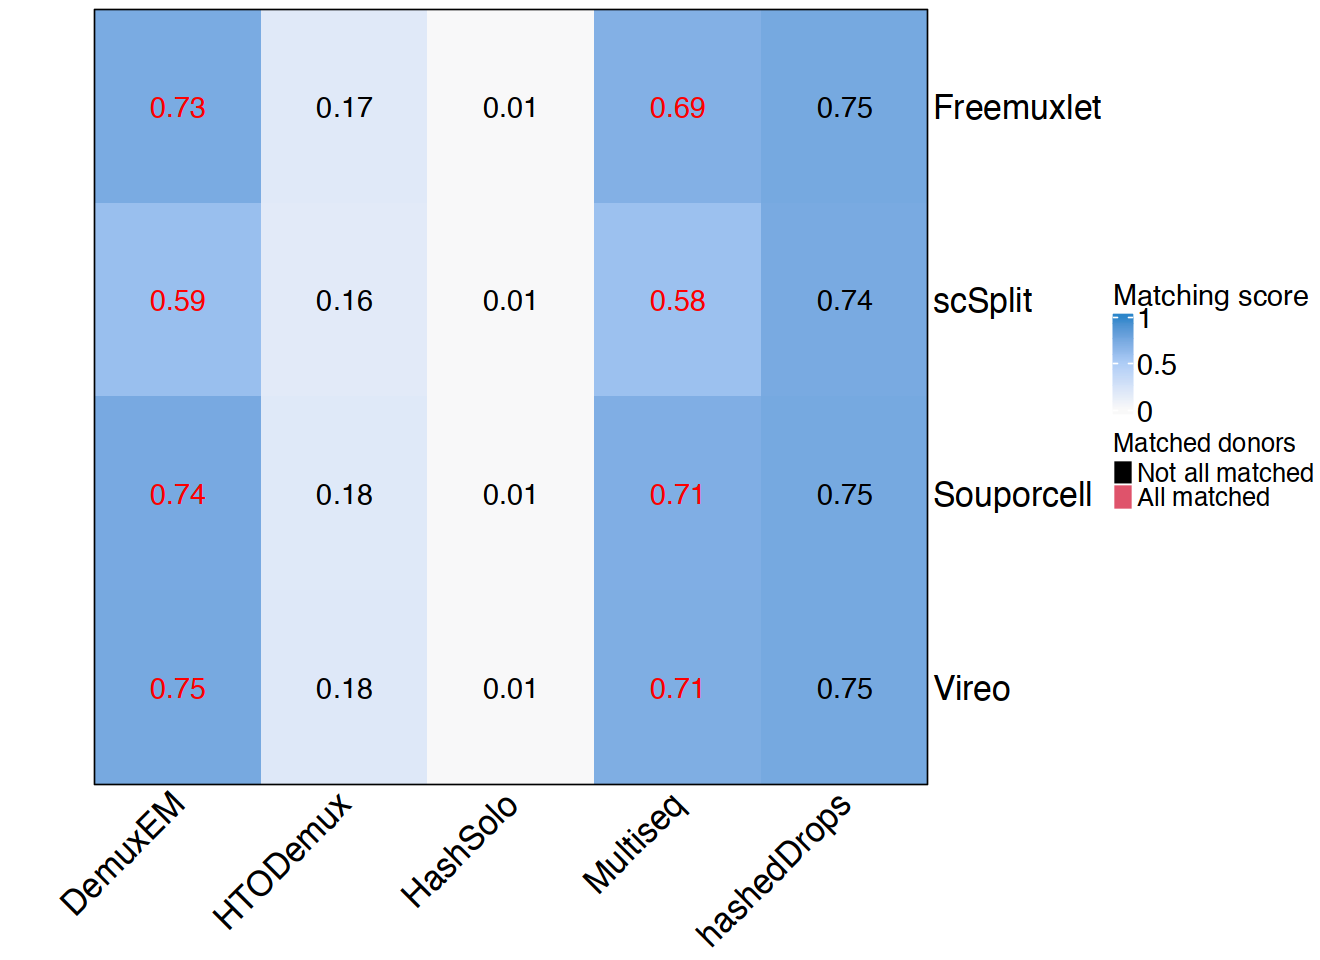

In [10]:
cpalette = circlize::colorRamp2(c(0,0.5,1), hcl.colors(4, "Blues 3", rev = T)[1:3])
options(repr.plot.width=11, repr.plot.height=8)
#pdf("heatmap_donor_match_gx12.pdf",width=11,height=8)
ht <- Heatmap(score_matrix, name = "Matching score", cluster_rows = F, show_column_dend = F, 
      col = cpalette,border = TRUE,
      column_order = sort(colnames(score_matrix)),
      column_names_gp = grid::gpar(fontsize = 20),
      row_names_gp = grid::gpar(fontsize = 20),
      heatmap_legend_param = list(
        labels_gp = gpar(fontsize = 17),
        title_gp = gpar(fontsize = 17)),
      column_names_rot = 45,
      cell_fun = function(j, i, x, y, width, height, fill) {
        if (j %in% c(1,2))
        grid.text(sprintf("%.2f", score_matrix[i, j]), x, y, 
            gp = gpar(fontsize = 17, col = "red"))
        else{
          grid.text(sprintf("%.2f", score_matrix[i, j]), x, y, gp = gpar(fontsize = 17, col = "black"))
        }
      }) 
lgd_list = list(
  Legend(labels = c("Not all matched", "All matched"), 
    title = "Matched donors", legend_gp = gpar(fill = 1:2),
    title_gp = gpar(fontsize = 15),
    labels_gp = gpar(fontsize = 15)))

draw(ht, heatmap_legend_list = lgd_list,heatmap_legend_side = "right", padding = unit(c(2, 20, 2, 2), "mm") )  
#dev.off()

## Visualisation of donor-specific variants

In [11]:
# Load informative_variants 
informative_variants <- fread("../data/pipeline_output/gx12/all_representative_variant_df.csv")
head(informative_variants)

V1,variant,Hash451,Hash452,Hash453,Hash454,Hash455,Hash456
<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
1,10_100361805,1,1,0,0,0,0
2,10_100361822,1,0,0,0,0,0
3,10_100486755,0,0,0,1,0,1
4,10_100986474,1,0,0,1,0,0
5,10_101389368,0,0,0,1,0,0
6,10_101389830,0,1,0,1,0,0


In [12]:
# filter donor-specifc variants
informative_variants$count <- rowSums(informative_variants[,-c(1,2)])
informative_variants <- informative_variants[informative_variants$count==1,]
informative_variants <- informative_variants[, 2:8]
head(informative_variants)

variant,Hash451,Hash452,Hash453,Hash454,Hash455,Hash456
<chr>,<int>,<int>,<int>,<int>,<int>,<int>
10_100361822,1,0,0,0,0,0
10_101389368,0,0,0,1,0,0
10_101817731,0,0,0,1,0,0
10_102476883,0,1,0,0,0,0
10_102476930,0,1,0,0,0,0
10_102814572,0,1,0,0,0,0


In [13]:
# Count donor-specifc variants
donor_specific_variants <- data.frame("donor"= setdiff(colnames(informative_variants), 'variant'), variants = 0 * (ncol(informative_variants)-1))
donor_specific_variants$variants <- colSums(informative_variants[,-1])
donor_specific_variants

donor,variants
<chr>,<dbl>
Hash451,555
Hash452,723
Hash453,436
Hash454,4200
Hash455,83
Hash456,1869


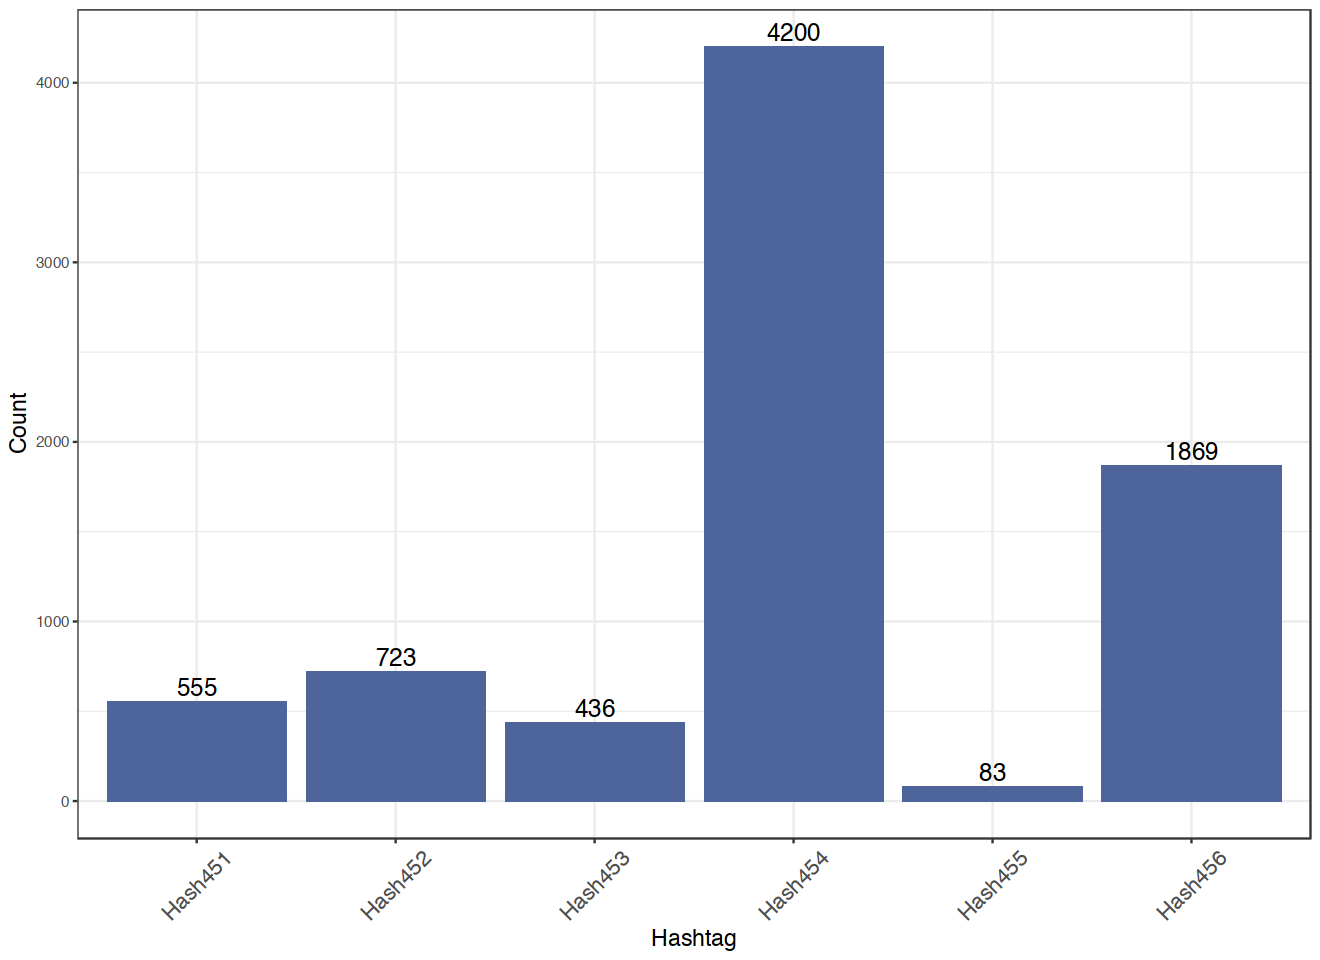

In [14]:
# make bar plot
ggplot(donor_specific_variants, aes(x=donor, y = variants)) + geom_bar(stat="identity", fill = "#4e659b") + theme_bw() + ##a6d5ed
  theme(axis.title=element_text(size=13.5)) + xlab("Hashtag") + ylab("Count") + 
  geom_text(aes(label=variants), vjust=-0.3, size=5) +
  theme(axis.text.x = element_text(angle = 45, vjust = 0.5, size = 13), 
  legend.text=element_text(size=12),legend.title=element_text(size=12))
# ggsave("Figure3.3-donor-specific-variants.png")